# PDS Project: Analyzing the Efficacy of Technical Analysis in Forex Trading

By: Omar & Jamil



<img src="https://www.forex.academy/wp-content/uploads/2023/04/what-are-zones-in-forex.jpg" style="height:300px;width:900px" />




# Table of Contents

- Introduction
- Libraries Required
- Loading and EDA
    - Line Plot
    - Time Series Decomposition
    - Lag Plot
    - Box Plot
- Preprocessing & EDA
- Backtesting TA Strategy
- Modelling
    - Decision Trees & Random Forest
    - KNN
    - Neural Network
- Conclusion  
- References

## 1. Introduction

These are the questions we want to cover in our study: 

Does technical analysis truly work in predicting EUR/USD exchange rates?

How do traditional technical analysis methods compare with machine learning models?


Introduction:

In this study, we are trying to find a technical analysis tool for predicting currency movements. We will be working for historical EUR/USD exchange rate data from Yahoo finance, where we aim to find and examine patterns that were present in this data. Our analysis mainly, firstly, we implement renowned technical analysis techniques such as Average Directional Index (ADX), Exponential Moving Average (EMA), and Relative Strength Index (RSI) to forecast future price trajectories. Secondly, we delve into the realm of artificial intelligence by constructing a Descion tree model, a Random Forests Classifier, a unscaled and a scaled KNN model, an MLP classifier, and finally, a RNN model to decode and predict future exchange rates using the same historical data. In the models we will mainly focus on the accuracy, precision, and recall. Finally, Our comprehensive comparative analysis seeks to shed light on a pivotal question: "Does technical analysis really work in forex trading?" Through this study, we aspire to unravel the efficacy of time-honored technical analysis against the cutting-edge neural network approach, providing an analytical lens to better understand the dynamics of forex trading.

-----

## 2. Libraries Required

In [1]:
# Install libraries if not already installed 
!pip install yfinance
!pip install backtesting
!pip install graphviz

In [2]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_ta as ta
from backtesting import Strategy, Backtest
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
import graphviz
from IPython.display import Image
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

/Users/omar/opt/anaconda3/lib/python3.9/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

/Users/omar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


-----

## 3. Loading and EDA

In [3]:
# Define the currency pair and time frame
currency_pair = 'EURUSD=X'
start_date = '2003-01-01'
end_date = '2023-01-01'

# Fetch historical data
eur_usd_data = yf.download(currency_pair, start=start_date, end=end_date)

print(eur_usd_data)

[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2003-12-01  1.203398  1.204007  1.194401  1.196501   1.196501       0
2003-12-02  1.196101  1.210903  1.194600  1.208897   1.208897       0
2003-12-03  1.209000  1.213003  1.207700  1.212298   1.212298       0
2003-12-04  1.212004  1.214403  1.204398  1.208094   1.208094       0
2003-12-05  1.207802  1.219096  1.206593  1.218695   1.218695       0
...              ...       ...       ...       ...        ...     ...
2022-12-26  1.066780  1.063717  1.060895  1.066780   1.066780       0
2022-12-27  1.064022  1.066900  1.061244  1.064022   1.064022       0
2022-12-28  1.063717  1.067430  1.061391  1.063717   1.063717       0
2022-12-29  1.062925  1.067019  1.061233  1.062925   1.062925       0
2022-12-30  1.066075  1.069793  1.063920  1.066075   1.066075       0

[4951 rows x 6 colum

In [4]:
# Created a copy of our dataframe
copy_eur_usd_data = yf.download(currency_pair, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [5]:
# Check the type the library gives
type(eur_usd_data)

pandas.core.frame.DataFrame

### 3.1 Line Plot

The historical graph of the EUR/USD exchange rate depicts a peak in the Euro's value against the Dollar around 2008, followed by periods of volatility and a general declining trend, especially in recent years. The chart showcases the Euro's fluctuating strength over two decades, with a smoothed representation suggesting a trend-focused overview of the currency pair's performance.

              Open         High          Low        Close    Adj Close  Volume
count  4951.000000  4951.000000  4951.000000  4951.000000  4951.000000  4951.0
mean      1.244858     1.249542     1.239742     1.244883     1.244883     0.0
std       0.124833     0.125525     0.125308     0.124826     0.124826     0.0
min       0.959619     0.967006     0.072902     0.959619     0.959619     0.0
25%       1.135531     1.138751     1.131913     1.135518     1.135518     0.0
50%       1.233776     1.238666     1.228245     1.233745     1.233745     0.0
75%       1.335345     1.339674     1.329328     1.335363     1.335363     0.0
max       1.598184     1.602821     1.587402     1.598798     1.598798     0.0


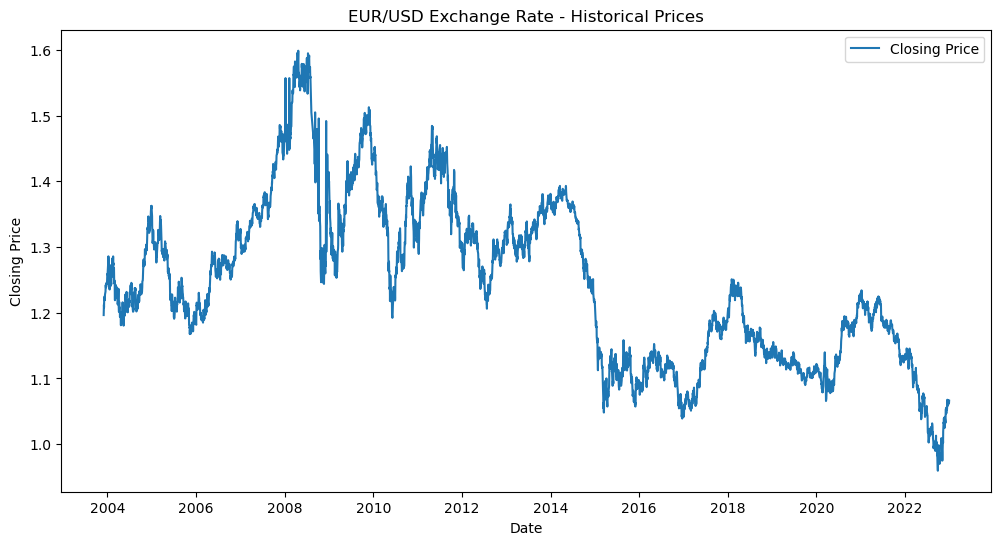

In [6]:
# Display summary statistics of the dataset
print(eur_usd_data.describe())

# Visualize the historical price movements
plt.figure(figsize=(12, 6))
plt.plot(eur_usd_data['Close'], label='Closing Price')
plt.title('EUR/USD Exchange Rate - Historical Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


### 3.2  Time Series Decomposition

The graph displays a time series decomposition of the EUR/USD closing prices into three components: trend, seasonality, and residual.

Trend Component: Shows a long-term decrease in the Euro's value against the Dollar, with noticeable peaks and troughs indicating periods of increase and subsequent decrease in value over the span from 2004 to 2022.

Seasonal Component: Indicates a repeating pattern within each year, suggesting some form of regular fluctuation in the exchange rate on a shorter, cyclical basis.

Residual Component: Represents the irregularities or 'noise' in the data after removing the trend and seasonal effects, which appears to be quite stable and random, indicating that the model has captured the trend and seasonality effectively.

In [7]:
# Converted our copy DataFrame's index to a DatetimeIndex
copy_eur_usd_data.index = pd.to_datetime(copy_eur_usd_data.index)


In [8]:
# Set the frequency of the index to Days 'D'
copy_eur_usd_data = copy_eur_usd_data.asfreq('D')  


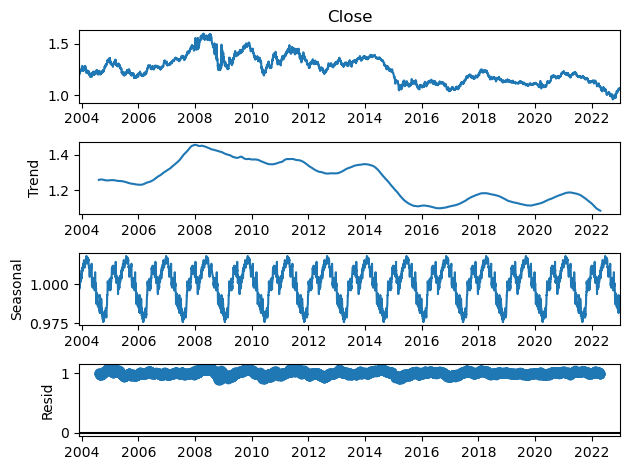

In [9]:
# Display the graphs
decomposition = seasonal_decompose(copy_eur_usd_data['Close'].dropna(), model='multiplicative', period=365)  
decomposition.plot()
plt.show()


### 3.3 Lag Plot

The points cluster along a diagonal line from the bottom-left to the top-right of the plot, which suggests that our data has a positive autocorrelation.

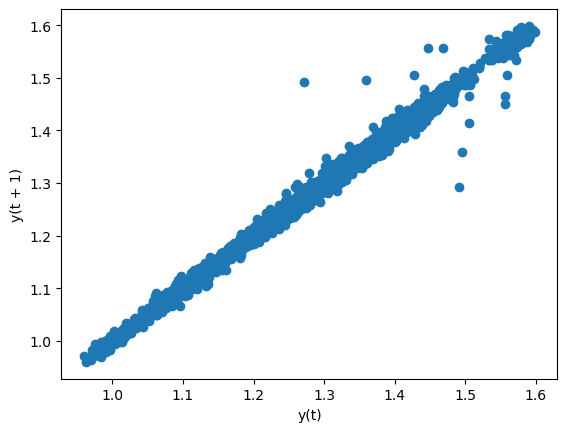

In [10]:
# Lag Plot 
pd.plotting.lag_plot(eur_usd_data['Close'])
plt.show()

### 3.4 Box Plot

The box plot shows that the median values are closely aligned across these metrics, with a relatively narrow interquartile range, indicating stable trading ranges. The presence of outliers in the Low price suggests occasional significant drops in the currency's value. The similarity in the boxes is becuase the values are relatively small.

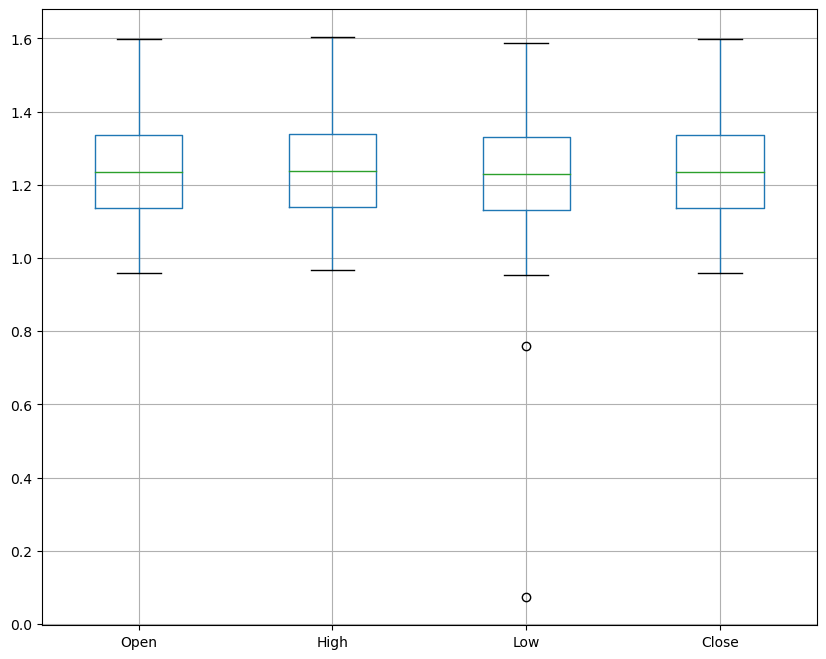

In [11]:
# Display Box Plot
eur_usd_data.boxplot(column=['Open', 'High', 'Low', 'Close'], figsize=(10, 8))
plt.show()

## 4. Preprocessing & EDA

Here in the cell below we dropped the Volume because it has zeros as the value in each row (as this data is forex and there is not central exchange to get the volume), and the Adj Close has the same values to the Close column (also because this is forex).

In [12]:
# Drop the 'Volume' and 'Adj Close' column
eur_usd_data = eur_usd_data.drop(columns=['Volume'])
eur_usd_data = eur_usd_data.drop(columns=['Adj Close'])
eur_usd_data

,Open,High,Low,Close
Date,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501
2003-12-02,1.196101,1.210903,1.194600,1.208897
2003-12-03,1.209000,1.213003,1.207700,1.212298
2003-12-04,1.212004,1.214403,1.204398,1.208094
2003-12-05,1.207802,1.219096,1.206593,1.218695
...,...,...,...,...
2022-12-26,1.066780,1.063717,1.060895,1.066780
2022-12-27,1.064022,1.066900,1.061244,1.064022
2022-12-28,1.063717,1.067430,1.061391,1.063717


Our data is from forex and it is for the currency exchange rates EUR/USD, and we want to classify the direction of the exchange rate whether it is up, down, or no change at a given time, therefore this makes it a fundamentally classification task. We also made a threshold becuase if the change is minimal we shouldnt care about it much as there are fees with each trade in real life.

In [13]:
# Set the thresholds for 'Up' and 'Down'
up_threshold = 0.005
down_threshold = -0.005  

# Default value
eur_usd_data['Direction'] = 'No Change'

# Identify the rows where the close price increased
eur_usd_data.loc[(eur_usd_data['Close'] > eur_usd_data['Close'].shift(1) + up_threshold), 'Direction'] = 'Up'

# Identify the rows where the close price decreased
eur_usd_data.loc[(eur_usd_data['Close'] < eur_usd_data['Close'].shift(1) + down_threshold), 'Direction'] = 'Down'

print(eur_usd_data)


                Open      High       Low     Close  Direction
Date                                                         
2003-12-01  1.203398  1.204007  1.194401  1.196501  No Change
2003-12-02  1.196101  1.210903  1.194600  1.208897         Up
2003-12-03  1.209000  1.213003  1.207700  1.212298  No Change
2003-12-04  1.212004  1.214403  1.204398  1.208094  No Change
2003-12-05  1.207802  1.219096  1.206593  1.218695         Up
...              ...       ...       ...       ...        ...
2022-12-26  1.066780  1.063717  1.060895  1.066780         Up
2022-12-27  1.064022  1.066900  1.061244  1.064022  No Change
2022-12-28  1.063717  1.067430  1.061391  1.063717  No Change
2022-12-29  1.062925  1.067019  1.061233  1.062925  No Change
2022-12-30  1.066075  1.069793  1.063920  1.066075  No Change

[4951 rows x 5 columns]


In [14]:
# Count the occurrences of each classification
classification_counts = eur_usd_data['Direction'].value_counts()
classification_counts

No Change    2911
Up           1032
Down         1008
Name: Direction, dtype: int64

Average Directional Index (ADX)
The ADX is a technical analysis indicator used to quantify the strength of a trend in a market. It is derived from a smoothed average of the range of price movement over a given period, usually 14 days. An ADX value over 25 typically suggests a strong trend, while values below 20 indicate a weak trend or non-trending conditions.

Exponential Moving Average (EMA)
EMA is a type of moving average that places a greater weight and significance on the most recent data points. It is more responsive to recent price changes compared to a simple moving average (SMA). For instance, a 50-day EMA would react more significantly to price movements over the most recent 50 days than older price changes.

Relative Strength Index (RSI)
RSI is a momentum oscillator that measures the speed and change of price movements. It oscillates between zero and 100. Traditionally, and according to Wilder, RSI is considered overbought when above 70 and oversold when below 30. These traditional levels can also be adjusted to better fit the security or analytical requirements.

In [15]:
# Implement Average Directional Index (ADX)
eur_usd_data.ta.adx(length=14, append=True)

# Implement Exponential Moving Averages (EMA)
eur_usd_data.ta.ema(length=50, append=True)

# Implement Relative Strength Index (RSI)
eur_usd_data.ta.rsi(length=14, append=True)

Date
2003-12-01          NaN
2003-12-02          NaN
2003-12-03          NaN
2003-12-04          NaN
2003-12-05          NaN
                ...    
2022-12-26    65.898283
2022-12-27    62.909556
2022-12-28    62.571030
2022-12-29    61.645518
2022-12-30    63.932054
Name: RSI_14, Length: 4951, dtype: float64

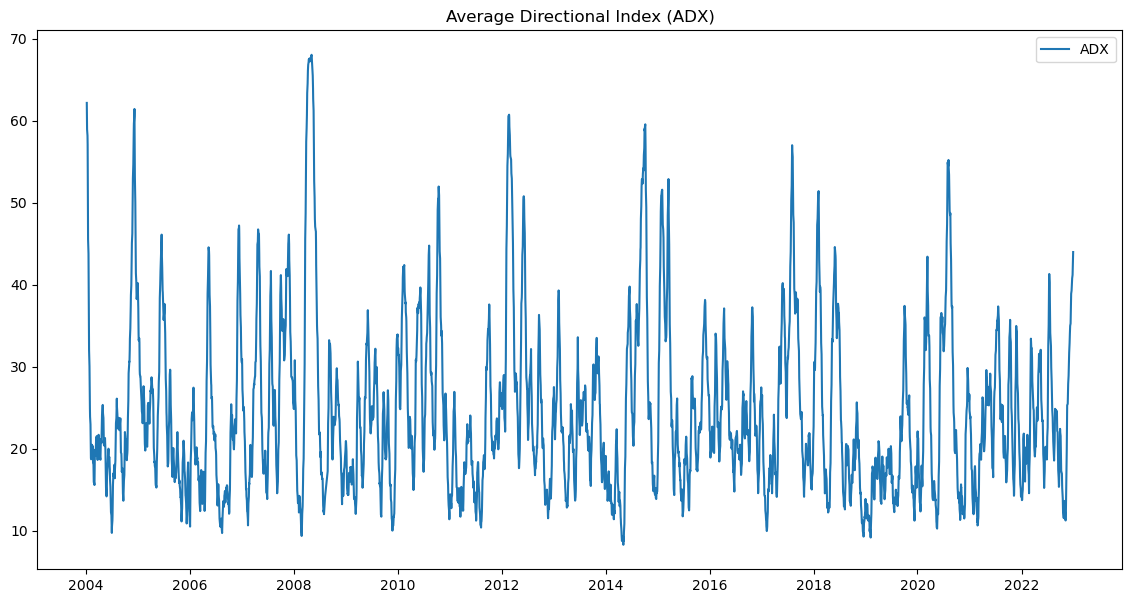

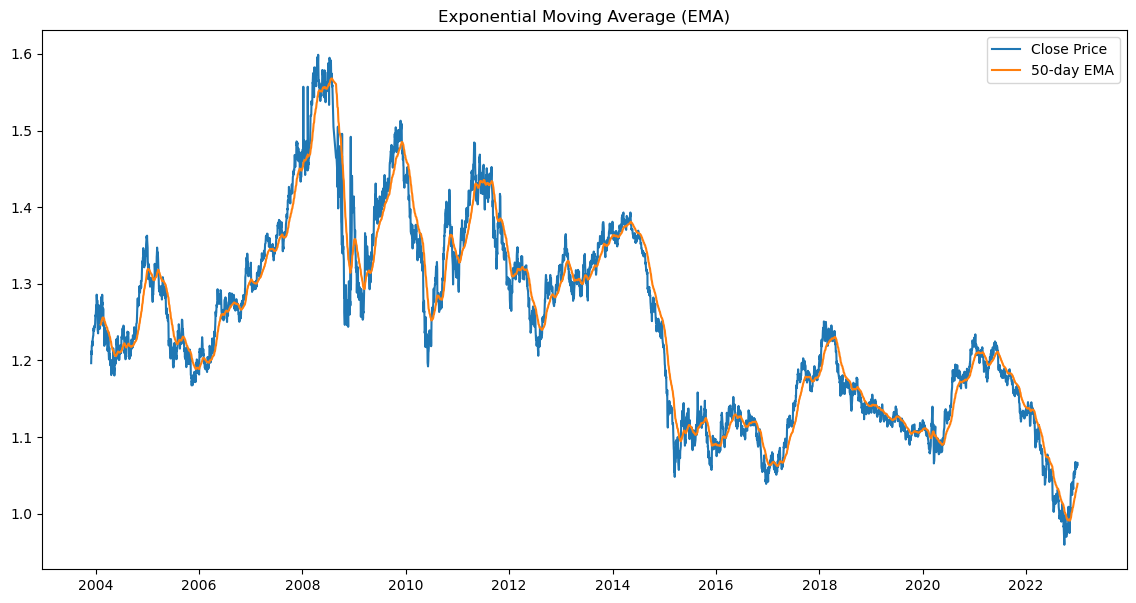

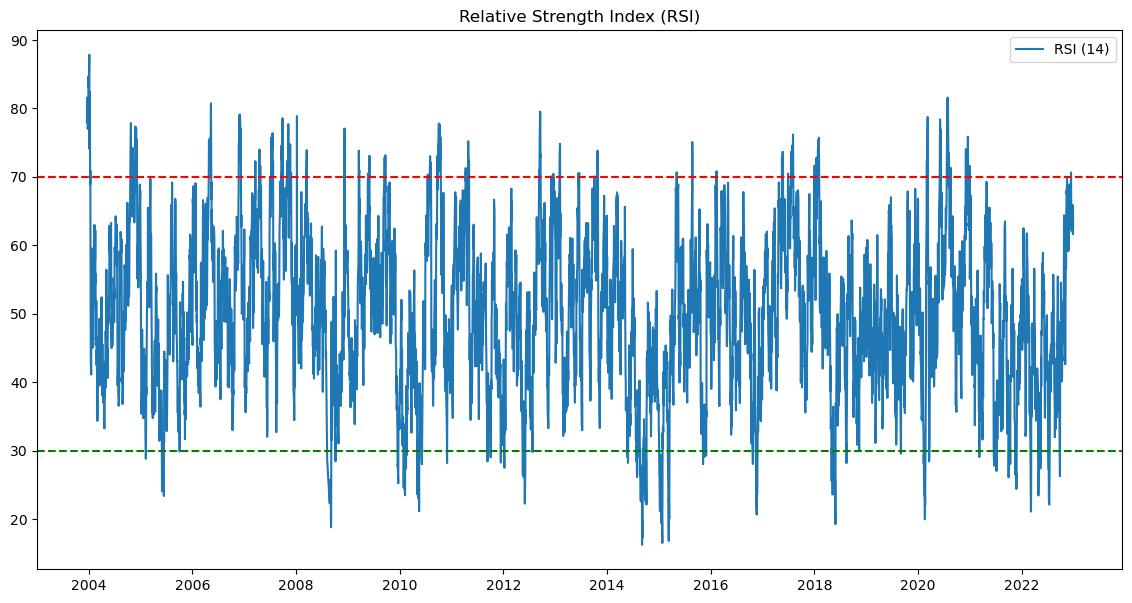

In [16]:
# Plotting ADX
plt.figure(figsize=(14, 7))
plt.plot(eur_usd_data['ADX_14'], label='ADX')
plt.title('Average Directional Index (ADX)')
plt.legend()
plt.show()

# Plotting EMA
plt.figure(figsize=(14, 7))
plt.plot(eur_usd_data['Close'], label='Close Price')
plt.plot(eur_usd_data['EMA_50'], label='50-day EMA')
plt.title('Exponential Moving Average (EMA)')
plt.legend()
plt.show()

# Plotting RSI
plt.figure(figsize=(14, 7))
plt.plot(eur_usd_data['RSI_14'], label='RSI (14)')
plt.axhline(70, color='red', linestyle='--')  # Overbought line
plt.axhline(30, color='green', linestyle='--')  # Oversold line
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()


ADX Graph Interpretation:

The ADX graph shows the strength of the trend over time. Values above 25 typically indicate a strong trend, either up or down, while values below 20 suggest a weak or non-trending market. The graph displays spikes above 25 at several points, indicating moments when the EUR/USD trend was strong. The fluctuations between 20 and 40 for most of the period suggest varying levels of trend strength, with no prolonged periods of a very strong or very weak trend.

EMA Graph Interpretation:

The EMA graph overlays the 50-day Exponential Moving Average on the closing price of the EUR/USD pair. The EMA line smooths out price data over a specified period, giving more weight to recent prices. When the EMA line is close to the price line, it suggests less volatility and a more stable market. When the price crosses above the EMA line, it might be interpreted as a bullish signal, and when it crosses below, as a bearish signal. The graph shows the EMA line tracking closely with the price, suggesting the EMA is responsive to price movements due to its emphasis on more recent prices.

RSI Graph Interpretation:

The RSI graph indicates the momentum and potential price reversals based on the speed and change of price movements. The RSI values oscillate between 0 and 100, with levels marked at 70 (overbought threshold) and 30 (oversold threshold). Periods where the RSI crosses above the 70 line suggest the currency pair may be overbought and could be due for a pullback or reversal. Conversely, dips below the 30 line suggest the currency pair may be oversold and could be due for a rebound. The graph shows the RSI frequently oscillating between these levels, indicating varying periods of potential overbuying or overselling.

These indicators are used by traders to make decisions on entry and exit points in the market. However, it's important to note that these indicators should not be used in isolation, as they are prone to producing false signals. They are typically used in conjunction with other indicators and fundamental analysis.

In [17]:
# Check the nulls
eur_usd_data.isnull().sum()

Open          0
High          0
Low           0
Close         0
Direction     0
ADX_14       27
DMP_14       14
DMN_14       14
EMA_50       49
RSI_14       14
dtype: int64

We decided to just drop the null values since we have enough data, and it wont affect our quantity that much

In [18]:
# Remove null values
eur_usd_data = eur_usd_data.dropna()

# Make sure no more null values
print(eur_usd_data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Direction    0
ADX_14       0
DMP_14       0
DMN_14       0
EMA_50       0
RSI_14       0
dtype: int64


In [19]:
# See the data after preprocessing
eur_usd_data

,Open,High,Low,Close,Direction,ADX_14,DMP_14,DMN_14,EMA_50,RSI_14
Date,,,,,,,,,,
2004-02-06,1.257008,1.272605,1.251894,1.270002,Up,18.701365,25.592140,18.263179,1.246749,57.937466
2004-02-09,1.265502,1.275705,1.265502,1.269406,No Change,18.786421,25.846040,17.297058,1.247637,57.606201
2004-02-10,1.269293,1.278707,1.267395,1.268504,No Change,19.092401,25.886933,16.269456,1.248456,57.074800
2004-02-11,1.268295,1.284703,1.265807,1.283005,Up,19.808496,26.451221,14.698561,1.249810,62.987253
2004-02-12,1.283302,1.284703,1.279607,1.281805,No Change,20.467663,25.729674,14.297608,1.251065,62.223181
...,...,...,...,...,...,...,...,...,...,...
2022-12-26,1.066780,1.063717,1.060895,1.066780,Up,41.183955,22.441366,8.160314,1.034853,65.898283
2022-12-27,1.064022,1.066900,1.061244,1.064022,No Change,41.872561,23.928457,7.801755,1.035997,62.909556
2022-12-28,1.063717,1.067430,1.061391,1.063717,No Change,42.560362,23.199456,7.426530,1.037084,62.571030


<AxesSubplot:xlabel='Date'>

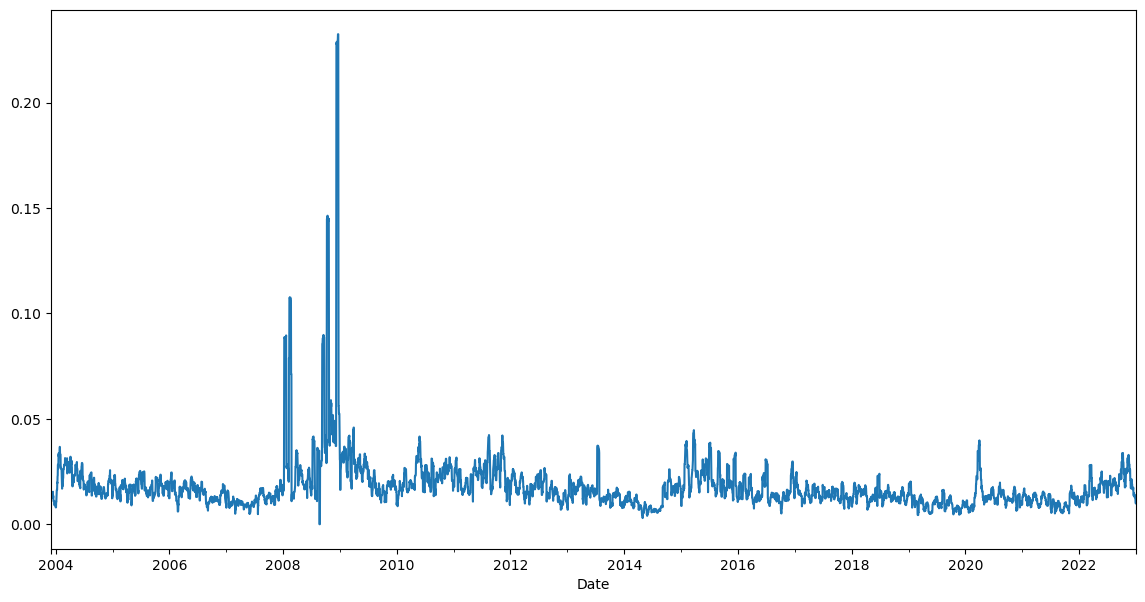

In [20]:
# Votality Analysis
copy_eur_usd_data['Return'] = copy_eur_usd_data['Close'].pct_change()
copy_eur_usd_data['Volatility'] = copy_eur_usd_data['Return'].rolling(window=14).std() * np.sqrt(14)
copy_eur_usd_data['Volatility'].plot(figsize=(14, 7))

Votality: Is a measure of how drastically the price has changed over a certain period of time.

General Volatility Trend: The plot shows periods of relatively low volatility interspersed with spikes indicating increased volatility. Volatility can be indicative of uncertainty or rapid changes in market sentiment.

Spikes in Volatility: The pronounced spikes, especially the one around 2008, likely correspond to significant economic events or news that had a substantial impact on the currency markets. The spike around 2008 corresponds with the global financial crisis, a period known for extreme market volatility.

Recent Activity: Toward the latter part of the graph, there are modest rises in volatility, which could be due to recent economic events, policy changes, or geopolitical tensions affecting market sentiment.

Volatility is a critical component for traders, as it can impact risk management strategies and the pricing of options. Higher volatility often leads to larger price swings, which can represent both greater risk and potential reward for traders.

## 5. Backtesting TA Strategy

This will be our baseline model and we will copare the results with the ML models. The backtesting a technical analysis (TA) strategy involves simulating how a trading strategy would have performed in the past based on historical data. It's a crucial step in the development of trading algorithms and strategies, allowing traders and analysts to evaluate the potential effectiveness of a strategy before risking actual capital.

Here are the steps for this testing strategy:

1) ADX must go over 25 level: The ADX is used to identify strong trends. By requiring the ADX to be over 25, this step ensures that the strategy only considers trades when there is a strong trend present. This is intended to filter out trading signals that occur during weak or sideways market conditions.

2) Use the 50 EMA to determine trend direction. Long > EMA and short < EMA: The 50-period EMA serves as a trend filter. If the price is above the 50 EMA, the market is considered to be in an uptrend, and only long positions (buying opportunities) are considered. Conversely, if the price is below the 50 EMA, the market is in a downtrend, and only short positions (selling opportunities) are considered. This helps align the trades with the prevailing market trend.

3) Entry Signal. RSI > 70 go long. RSI < 30 go short: The RSI is a momentum oscillator that measures the speed and change of price movements. By entering long positions when the RSI is above 70, the strategy seeks to capitalize on continuing upward momentum. Similarly, entering short positions when the RSI is below 30 attempts to exploit downward momentum. These thresholds are commonly used to identify overbought and oversold conditions.



In [21]:
# Create Signal Column
eur_usd_data['Signal'] = 0  # Initialize with 0

# Buy Signal: ADX > 25, Close > 50 EMA, RSI > 70
buy_condition = (eur_usd_data['ADX_14'] > 25) & (eur_usd_data['Close'] > eur_usd_data['EMA_50']) & (eur_usd_data['RSI_14'] > 70)
eur_usd_data.loc[buy_condition, 'Signal'] = 1

# Sell Signal: ADX > 25, Close < 50 EMA, RSI < 30
sell_condition = (eur_usd_data['ADX_14'] > 25) & (eur_usd_data['Close'] < eur_usd_data['EMA_50']) & (eur_usd_data['RSI_14'] < 30)
eur_usd_data.loc[sell_condition, 'Signal'] = 2

/var/folders/h5/_sdt2hvx1zsbbfv4kpj50m6r0000gn/T/ipykernel_2662/1321419349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eur_usd_data['Signal'] = 0  # Initialize with 0


In [22]:
# Count the occurrences of each classification
classification_counts = eur_usd_data['Signal'].value_counts()
classification_counts

0    4551
1     176
2     175
Name: Signal, dtype: int64

In [23]:
# See the data after preprocessing
eur_usd_data

,Open,High,Low,Close,Direction,ADX_14,DMP_14,DMN_14,EMA_50,RSI_14,Signal
Date,,,,,,,,,,,
2004-02-06,1.257008,1.272605,1.251894,1.270002,Up,18.701365,25.592140,18.263179,1.246749,57.937466,0
2004-02-09,1.265502,1.275705,1.265502,1.269406,No Change,18.786421,25.846040,17.297058,1.247637,57.606201,0
2004-02-10,1.269293,1.278707,1.267395,1.268504,No Change,19.092401,25.886933,16.269456,1.248456,57.074800,0
2004-02-11,1.268295,1.284703,1.265807,1.283005,Up,19.808496,26.451221,14.698561,1.249810,62.987253,0
2004-02-12,1.283302,1.284703,1.279607,1.281805,No Change,20.467663,25.729674,14.297608,1.251065,62.223181,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,1.066780,1.063717,1.060895,1.066780,Up,41.183955,22.441366,8.160314,1.034853,65.898283,0
2022-12-27,1.064022,1.066900,1.061244,1.064022,No Change,41.872561,23.928457,7.801755,1.035997,62.909556,0
2022-12-28,1.063717,1.067430,1.061391,1.063717,No Change,42.560362,23.199456,7.426530,1.037084,62.571030,0


In [24]:
# Smart way to implement the signals for our backtesting
def SIGNAL():
    return eur_usd_data['Signal']

class MyCandlesStrat(Strategy):
    # Initizalize the signal
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)
        
    # Define the rules
    def next(self):
        super().next()
        
        # Check for open positions
        if self.position:
            self.position.close()
        
        # Buy signal
        if self.signal1 == 1:
            self.buy()
            
        # Sell signal
        elif self.signal1 == 2:
            self.sell()

# Create Backtest instance
bt = Backtest(eur_usd_data, MyCandlesStrat, cash=10_000, commission=0)

# Run backtest
stat = bt.run()

# Display statistics
print(stat)


Start                     2004-02-06 00:00:00
End                       2022-12-30 00:00:00
Duration                   6902 days 00:00:00
Exposure Time [%]                    9.465524
Equity Final [$]                 10131.241169
Equity Peak [$]                  11244.676613
Return [%]                           1.312412
Buy & Hold Return [%]              -16.057225
Return (Ann.) [%]                    0.067051
Volatility (Ann.) [%]                3.168068
Sharpe Ratio                         0.021165
Sortino Ratio                        0.031013
Calmar Ratio                         0.006772
Max. Drawdown [%]                   -9.901889
Avg. Drawdown [%]                   -2.243772
Max. Drawdown Duration     2846 days 00:00:00
Avg. Drawdown Duration      510 days 00:00:00
# Trades                                  351
Win Rate [%]                        49.287749
Best Trade [%]                       5.959447
Worst Trade [%]                     -5.531978
Avg. Trade [%]                    

In [25]:
# Vizualize the backtesting with an interactive plot
bt.plot()

Row(id='1418', ...)

Top Panel: Equity

Blue Line (Equity): Shows the growth of equity over time if the trading strategy had been followed. The curve moves above 100%, indicating a profit over the initial investment.

Cyan Dot (Peak): Represents the highest value the equity reached, which is 112% of the initial investment.

Red Dot (Final): Indicates the final value of the equity, which is 101%, suggesting that the strategy ended the period in profit, although it had been higher at previous points and it shows that the gain was very minimal.

Yellow Area (Drawdown): Depicts periods where the equity value was declining, known as drawdowns. The largest drawdown is noted as -9.9%, which shows the biggest peak-to-trough drop during the backtest.

Max Dd Dur (Maximum Drawdown Duration): The longest period the strategy was in a drawdown, which is 2846 days.

Middle Panel: Profit and Loss for Each Trade

Green Triangles: Successful trades that closed with a profit.
Red Triangles: Unsuccessful trades that closed with a loss.

The spread and density of the triangles provide a visual representation of the strategy's win/loss ratio over time and its consistency.

Main Price Chart

Black Line: The actual price movement of the EUR/USD pair over the backtested period.
Green and Red Markers: These correspond to the trades shown in the middle panel but are plotted against the price chart to show where the strategy would have executed trades.
The markers allow you to visually correlate the trades with the price action.
Highlighted green and red background: These represent each month and if the price increase or decrease

Bottom Panel: Trading Signals
Blue Bars: These represent the signal that the startegy finds out, for example 1 is for a long postition (buy) and 2 is for a short postition (sell).

Overall, the strategy appears to be very slightly profitable, with the final equity above the starting point. However, it experienced a significant drawdown and a long period of recovery, which could be concerning from a risk management perspective. The distribution of trades against the price chart shows the strategy is active across various market conditions, taking both long and short positions. The performance metrics, such as the maximum drawdown and the drawdown duration, are critical for understanding the risk profile of the strategy.

## 6. Modelling

### 6.1 Decision Trees

In [26]:
# Features and target variable
features = ['Open', 'High', 'Low', 'Close', 'ADX_14', 'DMP_14', 'DMN_14', 'EMA_50', 'RSI_14']
X = eur_usd_data[features]
y = eur_usd_data['Direction']

# Drop rows with any remaining missing values
X.dropna(inplace=True)
y = y[X.index] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.5983690112130479
Confusion Matrix:
[[ 30 162   2]
 [ 16 556   2]
 [  8 204   1]]
Classification Report:
              precision    recall  f1-score   support

        Down       0.56      0.15      0.24       194
   No Change       0.60      0.97      0.74       574
          Up       0.20      0.00      0.01       213

    accuracy                           0.60       981
   macro avg       0.45      0.38      0.33       981
weighted avg       0.51      0.60      0.48       981



/var/folders/h5/_sdt2hvx1zsbbfv4kpj50m6r0000gn/T/ipykernel_2662/2106794168.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


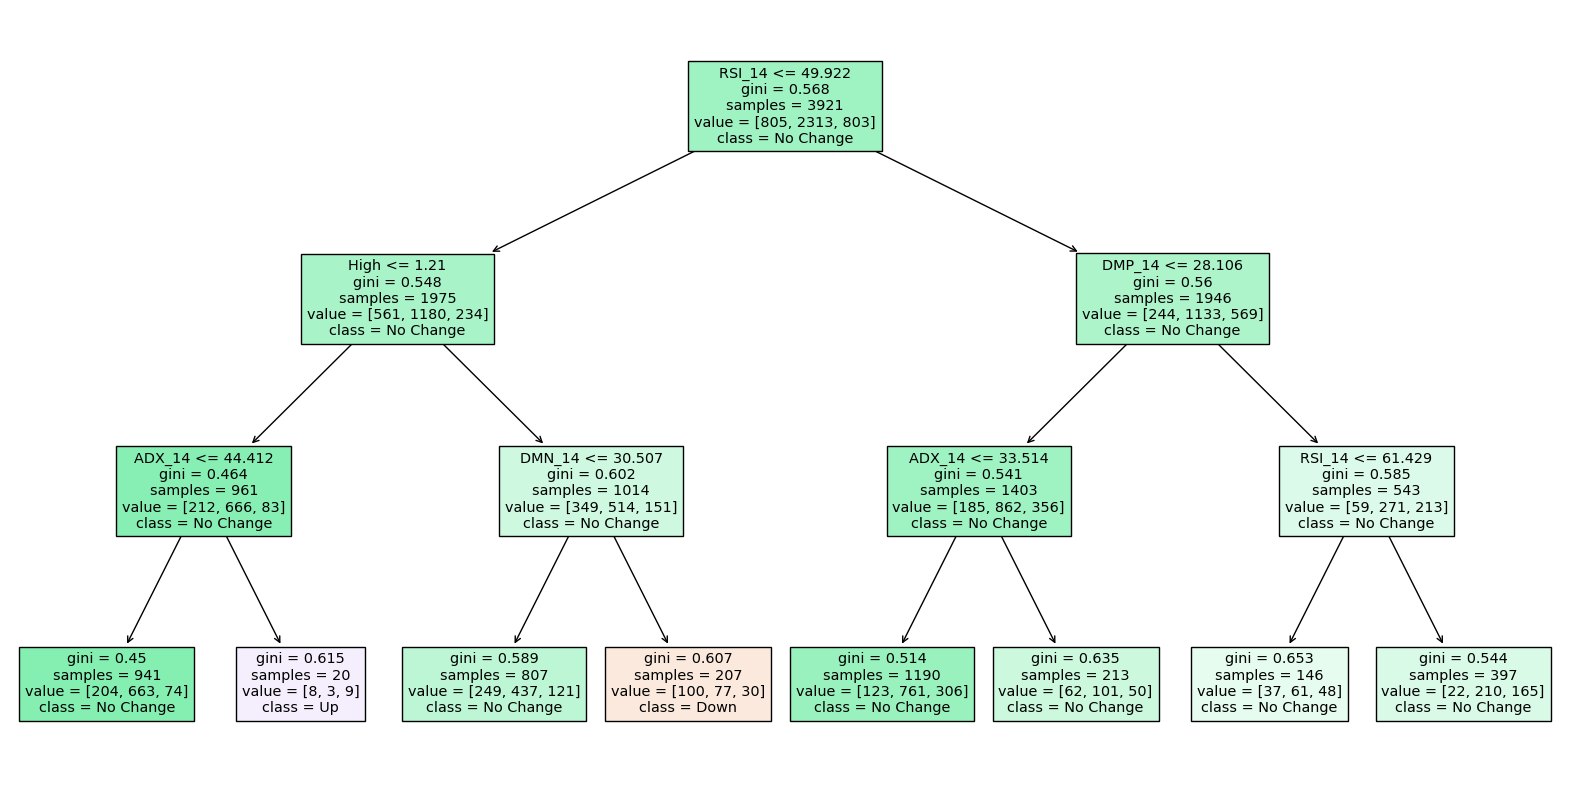

In [27]:
#Graph showing the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=features, class_names=['Down', 'No Change', 'Up'], filled=True)
plt.show()

We choose a decision tree model because:

Interpretability: Decision trees are highly interpretable; they provide a clear visualization of the decision-making process which is easy to understand. Each node represents a decision rule, and each branch represents an outcome, making it straightforward to follow the logic of the model.

Non-linearity: Decision trees can capture non-linear relationships between features and the target variable without needing any transformation of the features, which can be particularly useful in financial markets where relationships are often non-linear.

Feature Importance: They naturally rank features by importance. In trading strategies, this can help identify which technical indicators are most predictive of market movements.

The Decision Tree classifier  trained achieved an overall accuracy of approximately 59.8% on the test set. This accuracy represents the proportion of correctly predicted instances out of the total test set. Examining the confusion matrix provides further insight into the classifier's performance. The matrix shows that the model correctly predicted a substantial number of instances with 'No Change' in the EUR/USD exchange rates, accounting for 556 out of 574 instances, resulting in a high recall for this class (97%). However, the precision for 'No Change' is 60%, indicating that among the instances predicted as 'No Change,' 40% were misclassified as either 'Up' or 'Down.'

On the other hand, the model struggled with predicting instances of 'Down' and 'Up' directions. For 'Down,' the precision is 56%, indicating that among instances predicted as 'Down,' 44% were misclassified as either 'No Change' or 'Up.' The recall for 'Down' is relatively low at 15%, suggesting that the model missed a significant number of 'Down' instances. The precision and recall for the 'Up' class are particularly low at 20% and 0.01%, respectively, indicating a substantial number of misclassifications and a very low ability to capture instances of 'Up.'

In summary, while the model demonstrates a reasonable accuracy, its performance is imbalanced, with a notable strength in predicting 'No Change' but challenges in accurately classifying 'Up' and 'Down' directions, as indicated by lower precision and recall values for these classes. Further exploration and potential adjustments to the model such as getting more data and making it more balanced where there is a lot of 'Up' and 'Down' instances may enhance its predictive capabilities, especially for the less frequent classes.

In [28]:
# Features and target variable
features = ['Open', 'High', 'Low', 'Close', 'ADX_14', 'DMP_14', 'DMN_14', 'EMA_50', 'RSI_14']
X = eur_usd_data[features]
y = eur_usd_data['Direction']

# Drop rows with any remaining missing values
X.dropna(inplace=True)
y = y[X.index]  # Adjust the target variable accordingly

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, max_depth=3)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


/var/folders/h5/_sdt2hvx1zsbbfv4kpj50m6r0000gn/T/ipykernel_2662/999818321.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


Accuracy: 0.5851172273190621
Confusion Matrix:
[[  0 194   0]
 [  0 574   0]
 [  0 213   0]]
Classification Report:
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00       194
   No Change       0.59      1.00      0.74       574
          Up       0.00      0.00      0.00       213

    accuracy                           0.59       981
   macro avg       0.20      0.33      0.25       981
weighted avg       0.34      0.59      0.43       981



/Users/omar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/omar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/omar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


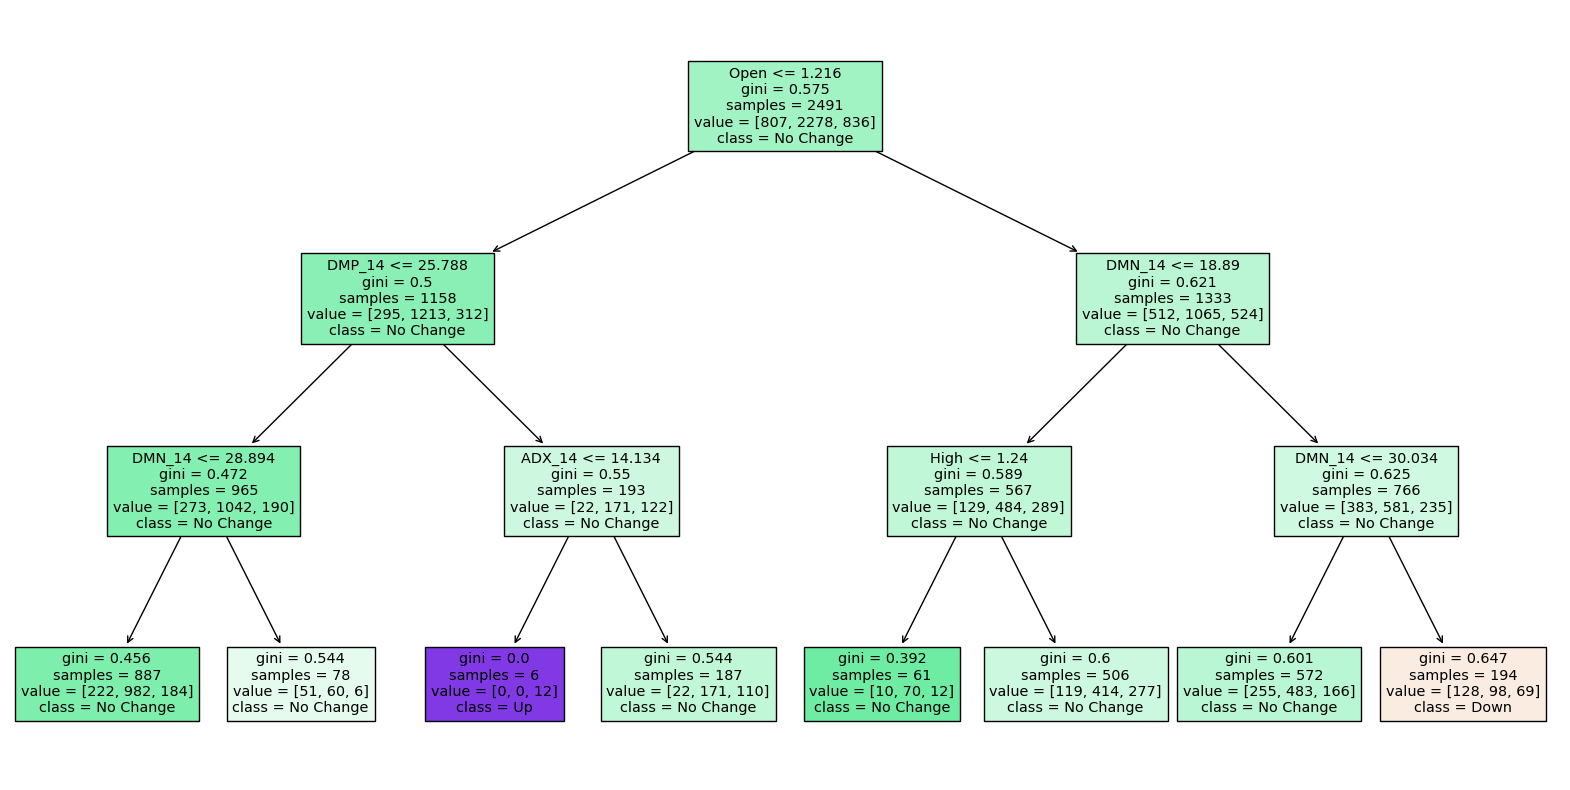

In [29]:
# Vizualize the tree
tree = rf_model.estimators_[0]

plt.figure(figsize=(20, 10))  # Set the size of the figure
plot_tree(tree, feature_names=features, class_names=['Down', 'No Change', 'Up'], filled=True)
plt.show()

We chose a random forests model because:

Robustness to Overfitting: Random Forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. It's less likely to overfit compared to a single decision tree.

Handling Complex Interactions: It can capture complex interactions between features without needing extensive feature engineering.

Feature Importance: Random Forest provides insights into the importance of each feature in predicting the target variable, which can be valuable for understanding the driving factors behind the model's predictions.

Versatility: It can be used for both classification and regression problems and works well with both categorical and numerical data.

Performance: Generally, Random Forest models have a good performance out of the box without the need for complicated parameter tuning. However for some reason the DT performed a bit better than this.

The Random Forest classifier trained exhibited an accuracy of approximately 58.5% on the test set, which is slightly lower than the Decision Tree model's accuracy of 59.8%. The confusion matrix reveals that the Random Forest model predicted only the 'No Change' class, completely neglecting instances of 'Down' and 'Up.' Consequently, the precision and recall values for 'No Change' are relatively high at 59% and 100%, respectively. However, the precision and recall for 'Down' and 'Up' are both zero, indicating that the model failed to correctly predict instances of these classes.

This unexpected performance may be attributed to the fact that the data is unvbalanced and how there are less 'Up' and 'Down' instances and to the fact that the low maximum depth parameter set for the Random Forest model (max_depth=3). A limited tree depth may result in overly simplistic decision boundaries, potentially struggling to capture the complexity of the underlying patterns in the data. Unlike a single Decision Tree, a Random Forest aggregates the predictions of multiple trees, which typically leads to a more robust and accurate model. However, in this case, the constrained depth might have hindered the Random Forest's ability to effectively distinguish between the classes, especially when compared to a Decision Tree with a similar depth.



### 6.2 KNN

We have 2 model the KNN model and the scaled model, as the scaled model might give us a better result.

In [30]:
# Features and target variable
features = ['Open', 'High', 'Low', 'Close', 'ADX_14', 'DMP_14', 'DMN_14', 'EMA_50', 'RSI_14']
X = eur_usd_data[features]
y = eur_usd_data['Direction']

# Drop rows with any remaining missing values
X.dropna(inplace=True)
y = y[X.index]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.5586136595310908
Confusion Matrix:
[[ 56 130   8]
 [ 72 458  44]
 [ 30 149  34]]
Classification Report:
              precision    recall  f1-score   support

        Down       0.35      0.29      0.32       194
   No Change       0.62      0.80      0.70       574
          Up       0.40      0.16      0.23       213

    accuracy                           0.56       981
   macro avg       0.46      0.42      0.41       981
weighted avg       0.52      0.56      0.52       981



/var/folders/h5/_sdt2hvx1zsbbfv4kpj50m6r0000gn/T/ipykernel_2662/1992929789.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
/Users/omar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:
# Features and target variable
features = ['Open', 'High', 'Low', 'Close', 'ADX_14', 'DMP_14', 'DMN_14', 'EMA_50', 'RSI_14']
X = eur_usd_data[features]
y = eur_usd_data['Direction']

# Drop rows with any remaining missing values
X.dropna(inplace=True)
y = y[X.index]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_scaled = knn_model.predict(X_test_scaled)

# Evaluate the model on scaled data
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
class_report_scaled = classification_report(y_test, y_pred_scaled)

print(f"Scaled Accuracy: {accuracy_scaled}")
print(f"Scaled Confusion Matrix:\n{conf_matrix_scaled}")
print(f"Scaled Classification Report:\n{class_report_scaled}")

Scaled Accuracy: 0.5596330275229358
Scaled Confusion Matrix:
[[ 60 125   9]
 [ 82 461  31]
 [ 25 160  28]]
Scaled Classification Report:
              precision    recall  f1-score   support

        Down       0.36      0.31      0.33       194
   No Change       0.62      0.80      0.70       574
          Up       0.41      0.13      0.20       213

    accuracy                           0.56       981
   macro avg       0.46      0.41      0.41       981
weighted avg       0.52      0.56      0.52       981



/var/folders/h5/_sdt2hvx1zsbbfv4kpj50m6r0000gn/T/ipykernel_2662/1267645662.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
/Users/omar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


We chose KNNs because:

Simplicity and Ease of Use: KNN is straightforward to implement and doesn't require making assumptions about the underlying data distribution, which is a significant advantage in financial applications where the market conditions can be volatile and unpredictable.

Non-parametric Nature: As a non-parametric method, KNN makes no assumptions about the form of the mapping function from input variables to the output variable. This is beneficial for financial time series data which often exhibit non-linear and complex patterns that parametric models may not capture effectively.

Flexibility: KNN is inherently a multi-class classifier, which aligns well with the need to predict multiple market movement categories, such as 'Up', 'Down', or 'No Change'.

However, the model's accuracy of approximately 55.86% suggests that it performs only slightly better than a random guess, considering this is a multi-class classification problem. The confusion matrix indicates a strong bias towards predicting 'No Change', which might be due to class imbalance or model's tendency to choose the majority class in the presence of uncertainty.

The classification report reveals a low precision for the 'Down' category and low recall for the 'Up' category, indicating that the model struggles to identify these movements accurately and often confuses them with 'No Change'.

The F1-scores for 'Down' and 'Up' are quite low, which implies a need for model improvement. For trading strategies, these metrics are critical as they reflect the balance between precision and recall—key factors in determining the reliability of trade signals generated by the model.

There was no significant difference found between the the scaled and unscaled KNN models. We think this is the case because there are no significant differences between the features they are realitively small, for example Open and Close may only have a 0.001 difference

### 6.3 Neural Network

In [32]:
# Features and target variable
features = ['Open', 'High', 'Low', 'Close', 'ADX_14', 'DMP_14', 'DMN_14', 'EMA_50', 'RSI_14']
X = eur_usd_data[features]
y = eur_usd_data['Direction']

# Drop rows with any remaining missing values
X.dropna(inplace=True)
y = y[X.index]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Neural Network (MLP) classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


/var/folders/h5/_sdt2hvx1zsbbfv4kpj50m6r0000gn/T/ipykernel_2662/3540513598.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


Accuracy: 0.7043832823649337
Confusion Matrix:
[[ 89  98   7]
 [ 29 504  41]
 [  6 109  98]]
Classification Report:
              precision    recall  f1-score   support

        Down       0.72      0.46      0.56       194
   No Change       0.71      0.88      0.78       574
          Up       0.67      0.46      0.55       213

    accuracy                           0.70       981
   macro avg       0.70      0.60      0.63       981
weighted avg       0.70      0.70      0.69       981



We chose a Multi-Layer Perceptron (MLP) neural network model for several reasons:

Non-linear Modeling: MLPs are capable of capturing complex, non-linear relationships between features and the target variable, which is common in financial time series data where interactions between indicators can be non-linear and intertwined.

Layered Structure: The structure of MLPs allows for the creation of multiple layers of neurons, enabling the model to learn multiple levels of abstraction. For financial data, this means it can pick up on subtle patterns that simpler models might miss.

Adaptability: Neural networks, including MLPs, can be adapted to a variety of tasks and configurations by changing the architecture, activation functions, and other hyperparameters, making them versatile for different predictive tasks.

Standardization: The scaling of features is particularly important for neural networks to ensure that all inputs are treated equally during the learning process. StandardScaler was used to standardize features, which is a common and necessary preprocessing step for MLPs.

Accuracy: The model achieved an accuracy of approximately 70.44%, which is a good score and suggests that the model is able to predict the direction ('Down', 'No Change', 'Up') of the financial instrument with a reasonable degree of reliability.

Confusion Matrix: The confusion matrix shows that the model has a stronger ability to predict the 'No Change' class compared to 'Down' and 'Up'. However, there are still misclassifications, especially between the 'Down' and 'No Change' classes, as well as the 'Up' and 'No Change' classes.

Classification Report:

Precision for 'Down' (0.72) is high, indicating that when the model predicts 'Down', it is correct most of the time.
Recall for 'No Change' (0.88) is high, showing that the model is good at identifying the majority of 'No Change' instances, <b>we think this is the case because when we did our EDA above, there are more 'No Change' instances that the other 2 classes (the data is a bit unbalanced)</b>.
F1-Score balances precision and recall and is particularly high for 'No Change' (0.78), which is the most common class. The lower F1-scores for 'Down' and 'Up' suggest the model is less adept at these classifications.

Iteration 1, loss = 1.05302326
Iteration 2, loss = 0.94146077
Iteration 3, loss = 0.90726559
Iteration 4, loss = 0.89247830
Iteration 5, loss = 0.88663251
Iteration 6, loss = 0.87779328
Iteration 7, loss = 0.87377992
Iteration 8, loss = 0.86885962
Iteration 9, loss = 0.86649566
Iteration 10, loss = 0.86272379
Iteration 11, loss = 0.85811999
Iteration 12, loss = 0.85571089
Iteration 13, loss = 0.85464934
Iteration 14, loss = 0.85020291
Iteration 15, loss = 0.84695059
Iteration 16, loss = 0.84562882
Iteration 17, loss = 0.84402511
Iteration 18, loss = 0.84183312
Iteration 19, loss = 0.83703811
Iteration 20, loss = 0.83699199
Iteration 21, loss = 0.83412139
Iteration 22, loss = 0.83037265
Iteration 23, loss = 0.82755103
Iteration 24, loss = 0.82442745
Iteration 25, loss = 0.82471935
Iteration 26, loss = 0.82174419
Iteration 27, loss = 0.82019691
Iteration 28, loss = 0.81745241
Iteration 29, loss = 0.81398580
Iteration 30, loss = 0.81101263
Iteration 31, loss = 0.80799396
Iteration 32, los

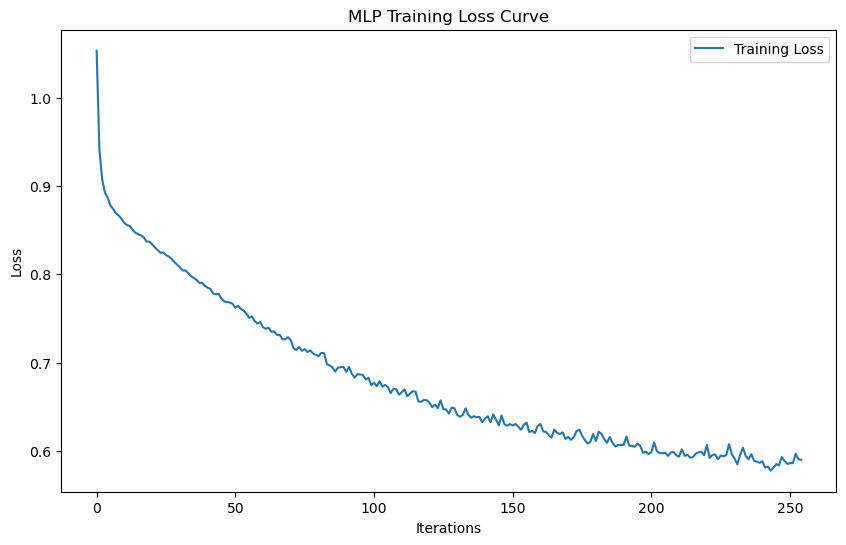

In [33]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, verbose=True, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Access the loss_curve_ attribute
loss_values = mlp_model.loss_curve_

# Plot the loss values
plt.figure(figsize=(10, 6))
plt.plot(loss_values, label='Training Loss')
plt.title('MLP Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

Loss Metric: The y-axis represents the loss, which is a measure of how well the model's predictions match the actual data. The lower the loss, the better the model's predictions are.

Iterations: The x-axis shows the number of iterations, also known as epochs, during the training process. Each iteration represents a complete pass through the dataset during which the model's weights are updated.

Trend: The curve itself shows a downward trend, indicating that as the number of iterations increases, the loss decreases. This suggests that the model is learning from the data over time.

Behavior: Initially, there's a sharp decrease in loss, which typically happens when the model starts learning from a random state of knowledge. As iterations continue, the rate of decrease slows down, which is common as the model starts converging to a more optimal set of parameters.

Convergence: Towards the end of the curve, the loss levels off, which suggests that the model is approaching convergence, meaning further training might not lead to significant improvements in the loss metric.

Stability: The curve does not show any significant spikes or erratic behavior, indicating that the training process is relatively stable.

## 7. Conclusion

So, did we manage to answer our overarching question 'Does Technical Analysis Actually Work'? Yes and no, For this particular strategy we have uncovered that technical analysis does not work, as the models performed better than the strategy (actually it was the lowest performance). However, we can not generalise this finding to all Technical Analysis forex trading strategies, as there thousands of strategies that might work and we have not tested.

In conclusion, the backtesting strategy produced a win rate of 49.28% scoring lower than we expected and lower than the models we used which were: Decision Tree Model, Random Forests Classifier, the 2 KNN models,a and the MLP Classifier. Our model accuracies were as follows for the Decision Tree Model its accuracy was 0.598, for the Random Forests Classifier the accuracy was  0.585, for the KNN model the non-scaled and the scaled they both scored nearly similar accuracies of 0.559, however the highest accuracy was scored by the MLP Classifier with an accuracy of 0.704. Based on these results, we can conclude that using the MLP classifier model would be the best option and it would be better than the backtesting strategies and the other models.

## 8. References

- https://kernc.github.io/backtesting.py/
- https://medium.com/geekculture/top-4-python-libraries-for-technical-analysis-db4f1ea87e09
- https://www.youtube.com/watch?v=kdyQfSk-do0
- https://www.youtube.com/watch?v=N9NqTp_D_bw
- https://www.youtube.com/watch?v=vPBwO6Fa6rc
- https://algotrading101.com/learn/backtesting-py-guide/
- https://www.youtube.com/watch?v=f2gxz8JbrlQ
- https://www.youtube.com/watch?v=e4ytbIm2Xg0